In [1]:
import pandas as pd

#**Import the Data**

In [3]:
df = pd.read_csv('/content/df_audio_features_5000.txt')
df_names= pd.read_csv('/content/df_audio_features_5000.txt')

In [37]:
df_names.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


# **Dropping the space and unuseful columns**

In [5]:
df_2 = df 

Dropping the columns which are not useful

In [6]:
df_2.drop('name                                                                                                                                                                             ', axis=1, inplace=True)
df_2.drop('artist                                          ', axis=1, inplace=True)
df_2.drop('id                     ', axis=1, inplace=True)
df_2.drop('html', axis=1, inplace=True)
df_2.drop('mode ', axis= 1, inplace= True)
df_2.drop('time_signature ', axis= 1, inplace= True)
df_2.drop('duration_ms ', axis= 1, inplace= True)
df_2.drop('type ', axis= 1, inplace= True)

In [7]:
# name the columns without the space etc.
df_2.columns = ["danceability", "energy", "key", "loudness","speechiness", "acousticness", "instrumentalness", "liveness", "valence",	"tempo"]
df_names.columns = ["name", "artist", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence",	"tempo", "type", "duration_ms",	"time_signature", "id",	"html"]#

# **Cleaning & Normalising the 5000 songs Playlist**




In [17]:
songs = df

In [20]:
# import needed libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import random

In [21]:
songs_norm = MinMaxScaler().fit_transform(songs) # Take the lowest value and the highst value in 1 column and scaled/normalise it so that every columns is comparable

In [47]:
songs_norm = pd.DataFrame(songs_norm) # make a df of the scaled variable
songs_norm.columns = ['danceability', 'energy',	'key',	'loudness',	'speechiness',	'acousticness',	'instrumentalness',	'liveness',	'valence',	'tempo'] # name columns
songs_norm.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.680455,0.2590,1.000000,0.763897,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800
1,0.767322,0.3990,0.181818,0.771967,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322
2,0.880041,0.7300,0.181818,0.798018,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862
3,0.729059,0.0502,0.363636,0.682811,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098
4,0.673216,0.1190,0.545455,0.655228,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171


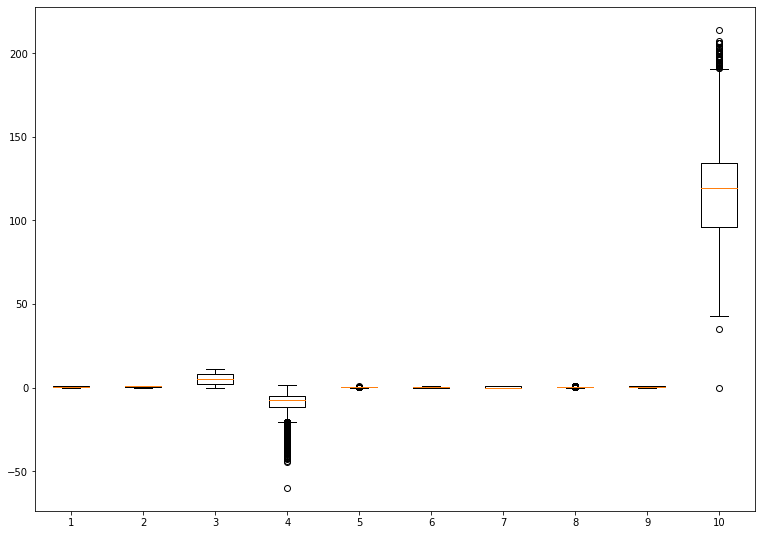

In [23]:
# Plot the range of features 

data = [songs[x] for x in songs.columns] #df without the scaled data
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes 
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)

# show plot
plt.show()

In [24]:
# Selecting the features on which we will depend the number of clusters and remove the features with low variance. Then compare the remaining columns with the graph above

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=1)  
songs_selected_fea = sel.fit_transform(songs)

songs_name_sel_fea= sel.get_feature_names_out()
songs_name_sel_fea

array(['key', 'loudness', 'tempo'], dtype=object)

In [49]:
key_loud_tem = songs_norm[['key', 'loudness', 'tempo']].copy() # selecting the featrues with the highest variance, on which we will descide the clusters
key_loud_tem.head()

,key,loudness,tempo
0,1.000000,0.763897,0.515800
1,0.181818,0.771967,0.584322
2,0.181818,0.798018,0.437862
3,0.363636,0.682811,0.499098
4,0.545455,0.655228,0.565171


# **K-Means of the 1000 song Playlist & Final_df**

In [26]:
# 1. import the model
from sklearn.cluster import KMeans
 
# 2. initialize the model
my_kmeans = KMeans(n_clusters= 6)
 
# 3. fit the model to the data
my_kmeans.fit(key_loud_tem) # pass scaled data with the 3 features here
 
# 4. obtain the cluster output
clusters = my_kmeans.predict(key_loud_tem) # pass scaled data with the 3 features here
 
# 5. attach the cluster output to our original DataFrame
key_loud_tem["cluster"] = clusters

In [27]:
key_loud_tem.sample(10)

,key,loudness,tempo,cluster
4672,0.454545,0.676535,0.447633,3
2950,1.000000,0.887369,0.579649,5
1700,0.363636,0.899661,0.514113,3
2340,0.454545,0.916680,0.654568,4
2099,0.181818,0.466662,0.513501,2
3534,0.545455,0.897020,0.677233,4
4845,0.636364,0.912507,0.607299,4
540,0.000000,0.867497,0.673443,0
3078,1.000000,0.888249,0.724347,5
1210,0.000000,0.860732,0.571709,0


In [28]:
#average value that each cluster has for each one of the features the we are using
key_loud_tem.groupby(by="cluster").mean() 

,key,loudness,tempo
cluster,,,
0,0.100339,0.852699,0.658052
1,0.751957,0.790108,0.439636
2,0.096903,0.789041,0.441113
3,0.426226,0.817544,0.493622
4,0.602441,0.850404,0.676827
5,0.921109,0.846533,0.596769


# **Putting the missing columns/deleted columns back into the df & reorganize the columns**

In [29]:
key_loud_tem = pd.DataFrame(key_loud_tem)

In [38]:
key_loud_tem[['name','artist','id', 'html']] = df_names[['name','artist', 'id', 'html']].copy()  # merging the two df to get the final df with the clusters and the info

In [42]:
pd.set_option('display.max_colwidth', 300)

In [46]:
key_loud_tem.sample(10)

,key,loudness,tempo,cluster,name,artist,id,html
685,0.090909,0.871458,0.565793,0,Bad Liar,Selena Gomez,1sCxVKWImDZSZKvG0U9B23,https://open.spotify.com/track/1sCxVKWImDZSZKvG0U9B23
3860,0.090909,0.865590,0.562919,0,The Glorious Dead,Gorefest,3nxZp6V9qdza9vxE1yMkzd,https://open.spotify.com/track/3nxZp6V9qdza9vxE1yMkzd
1253,0.363636,0.864872,0.697257,3,Got My Mind Set On You - Remastered 2004,George Harrison,3OeUlriM0EZHdWleJtjoVr,https://open.spotify.com/track/3OeUlriM0EZHdWleJtjoVr
4082,0.909091,0.851847,0.629104,5,The Call,Necrophobic,7aSv7dmCozRb20iwrzVIg8,https://open.spotify.com/track/7aSv7dmCozRb20iwrzVIg8
313,0.000000,0.763539,0.556306,2,Ordinary Girls,English Singles,33wD19xH3gaHBXWjQzbEyD,https://open.spotify.com/track/33wD19xH3gaHBXWjQzbEyD
675,0.363636,0.889358,0.556087,3,Cake By The Ocean,DNCE,2aFiaMXmWsM3Vj72F9ksBl,https://open.spotify.com/track/2aFiaMXmWsM3Vj72F9ksBl
4275,0.000000,0.789508,0.728071,0,Subconscious Release,Desecrator,2T3nGCnuibz8gslXrryuV7,https://open.spotify.com/track/2T3nGCnuibz8gslXrryuV7
1397,0.000000,0.879234,0.545114,0,Picture Of You,Boyzone,2AlVWg58iy4Cx6KqD0XYu2,https://open.spotify.com/track/2AlVWg58iy4Cx6KqD0XYu2
4742,0.090909,0.892260,0.691920,0,Dieses Leben,Juli,42fMytavcqD1KHOcNiexN5,https://open.spotify.com/track/42fMytavcqD1KHOcNiexN5
4337,0.363636,0.775015,0.531997,3,Freezer Burnt,Broken Hope,7kz8QQ148alvp1WnJpiKtF,https://open.spotify.com/track/7kz8QQ148alvp1WnJpiKtF


# **centroids**

In [31]:
# centroids = Geometrischer Schwerpunkte
centroids = my_kmeans.cluster_centers_
centroids = pd.DataFrame(centroids)
centroids.columns = ['key',	'loudness',	'tempo']

In [32]:
centroids

,key,loudness,tempo
0,0.100339,0.852699,0.658052
1,0.751499,0.790671,0.440294
2,0.096903,0.789041,0.441113
3,0.426226,0.817544,0.493622
4,0.602090,0.850242,0.677284
5,0.921303,0.846411,0.596601


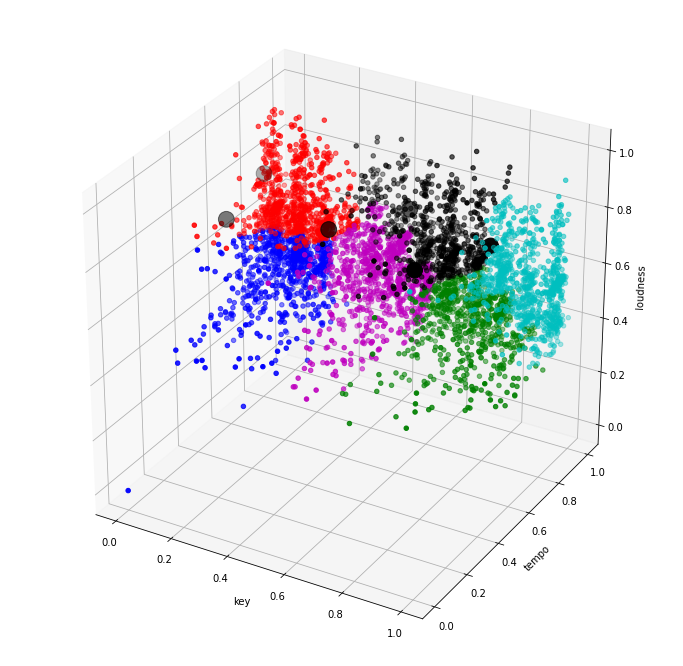

In [33]:
# Visualising the data (key_loud_tem) and the clusters
# Import libraries
import matplotlib.pyplot as plt
import random


# set plot features
colors = ['r','g','b', 'm', 'k', 'c']
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')


for color, d in key_loud_tem.groupby('cluster'):
  ax.scatter(d['key'], d['loudness'], d['tempo'],color=colors[color], label=d['cluster'])
ax.scatter(centroids['key'],centroids['tempo'],centroids['loudness'], color='black', s=250)
ax.set_xlabel('key')
ax.set_ylabel('tempo')
ax.set_zlabel('loudness')
plt.show()

# **Finding  the right amount of clusters**





In [ ]:
# Finding the right amount of cluster using the elbow method
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1,30):
    myKMeans = KMeans(n_clusters=i)
    myKMeans.fit(key_loud_tem)
    inertia_list.append(round(myKMeans.inertia_))

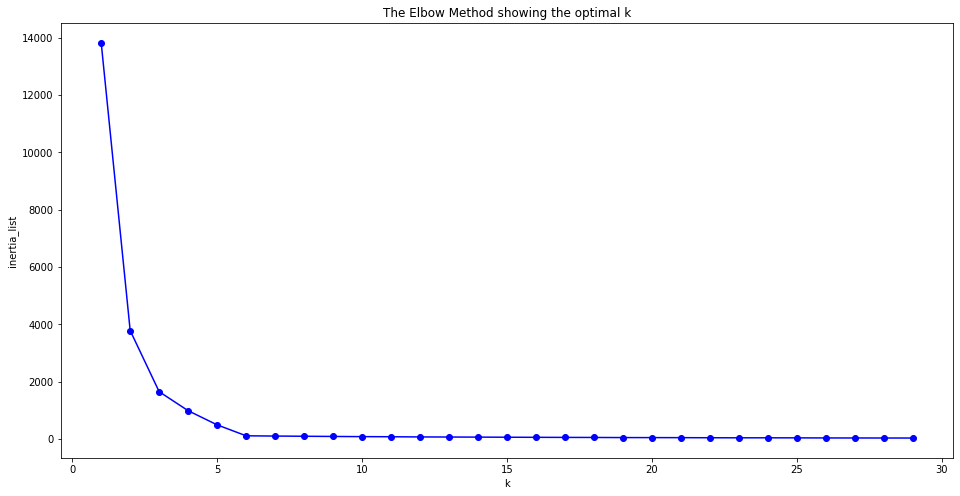

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(range(1,30), inertia_list, 'bx-', marker='o')
plt.xlabel('k')
plt.ylabel('inertia_list')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Finding the right amount of cluster using the Silhouette method

In [ ]:
import sklearn.metrics as metrics
import sklearn.cluster as cluster

In [ ]:
# silhouette_score for a different number of clusters
#the cluster with the highest value (max.1) is the best number of cluster
from sklearn.metrics import silhouette_score

Silhouette_score_for_clusters = []
for i in range(2,30):
    myKMeans = KMeans(n_clusters=i)
    myKMeans.fit(key_loud_tem)
    Silhouette_score_for_clusters.append(silhouette_score(key_loud_tem, myKMeans.labels_))

Silhouette_score_for_clusters

[0.6165414280124127,
 0.6303298486034898,
 0.6519876475522575,
 0.731701113166676,
 0.8236905728108541,
 0.7617236384118274,
 0.6774220850799761,
 0.5861866851526292,
 0.5219030860824873,
 0.43706809251147843,
 0.37345003157872664,
 0.3614492314605747,
 0.34337105484442865,
 0.3367069506353278,
 0.33829726668156024,
 0.35993481347629475,
 0.31992721941998126,
 0.3243060762452449,
 0.3390112320308734,
 0.34975673547794506,
 0.3387587802957085,
 0.3376829293512525,
 0.32296664395534386,
 0.33931040475813407,
 0.34164521410077714,
 0.3411058622744395,
 0.341060199057162,
 0.3375576636572138]

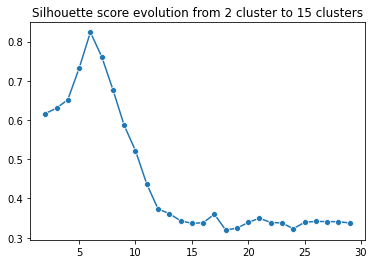

In [ ]:
# Graph for the Silhouette score per k(clusters) = x
plt.title(f'Silhouette score evolution from 2 cluster to {15} clusters')
sns.lineplot(x=range(2, 30), y=Silhouette_score_for_clusters, marker='o')
plt.show()

Visualising the clustered groups using the Silhouette method

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

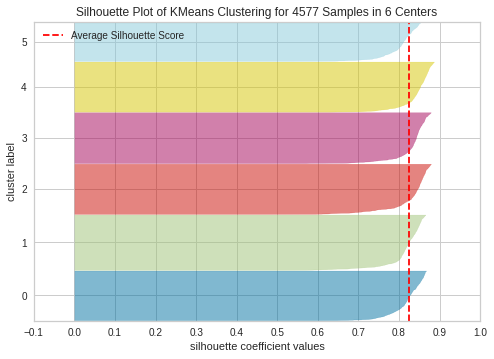

In [ ]:
model = KMeans(6, random_state=42) #6 bc we choose 6 clusters
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(key_loud_tem)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure